<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_Aglo%2BDendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# импорт библиотек
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# импорт доп библиотек для дендрограмм
from scipy.cluster.hierarchy import dendrogram, ward

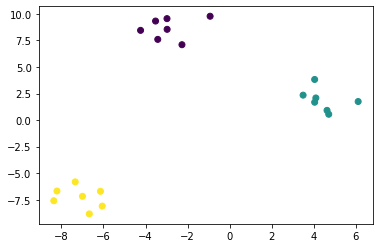

In [5]:
# создание данных
x, y = datasets.make_blobs(n_samples=21, random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y);

In [6]:
# подготовка данных
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std[:5]

array([[-0.0845805 ,  0.91500911],
       [-0.2311639 ,  1.28794144],
       [-0.4898337 ,  1.1201645 ],
       [-0.34311636,  1.25327095],
       [ 1.22638772,  0.15316424]])

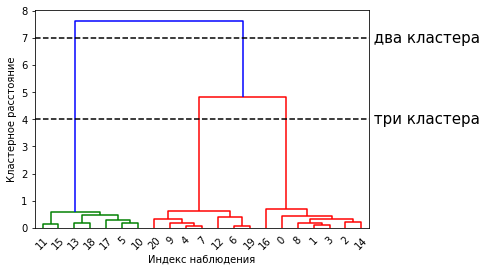

In [20]:
# масссив для дендрограммы
link_array = ward(x_std)
dendrogram(link_array)

ax = plt.gca() 
bounds = ax.get_xbound() 
ax.plot(bounds, [7.0, 7.0], '--', c='k') 
ax.plot(bounds, [4, 4], '--', c='k')  
ax.text(bounds[1], 
        7.0,
        ' два кластера',
        va='center',
        fontdict={'size': 15})
ax.text(bounds[1],
        4,
        ' три кластера',
        va='center',
        fontdict={'size': 15})
plt.xlabel('Индекс наблюдения')
plt.ylabel('Кластерное расстояние');

In [21]:
# получив результат в 3 кластера обучим модель
cluster = AgglomerativeClustering(n_clusters=3)
model = cluster.fit(x_std)
model.labels_[:5]

array([0, 0, 0, 0, 2])